<a href="https://colab.research.google.com/github/dsliwka/EEMP2024/blob/main/TreeExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
## Generate some data where we know the true CEF
n = 500
df = pd.DataFrame(index=range(n))

# Generate age variable
df['age'] = np.random.uniform(18, 70, size = n)

# Generate "true" Conditional expectation function of income
df['CE']=4*df['age']-0.045*df['age']**2

# Generate realized income = CE (which depends on age) + irreducible noise
df['income'] = df.CE + np.random.normal(0,10,n)

# Prepare prediction
X = df[['age']]
y = df['income']

<Axes: xlabel='age', ylabel='income'>

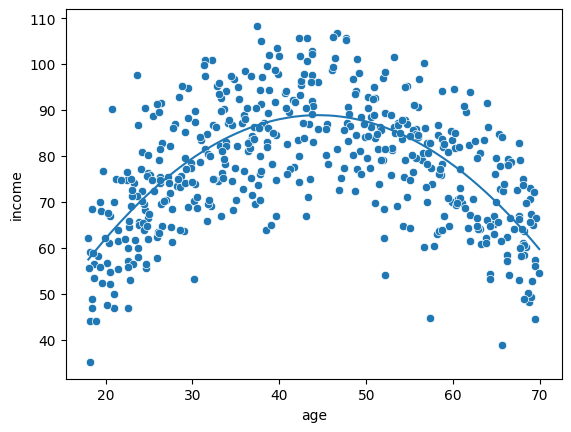

In [ ]:
## Show the data
sns.scatterplot(x='age', y='income', data=df)

## The lineplot shows the true CEF
sns.lineplot(x='age', y='CE', data=df)


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



In [ ]:
dtree=DecisionTreeRegressor(max_depth=1).fit(X,y)
print("R²:", round(r2_score(y,dtree.predict(X)), 3))

R²: 0.17


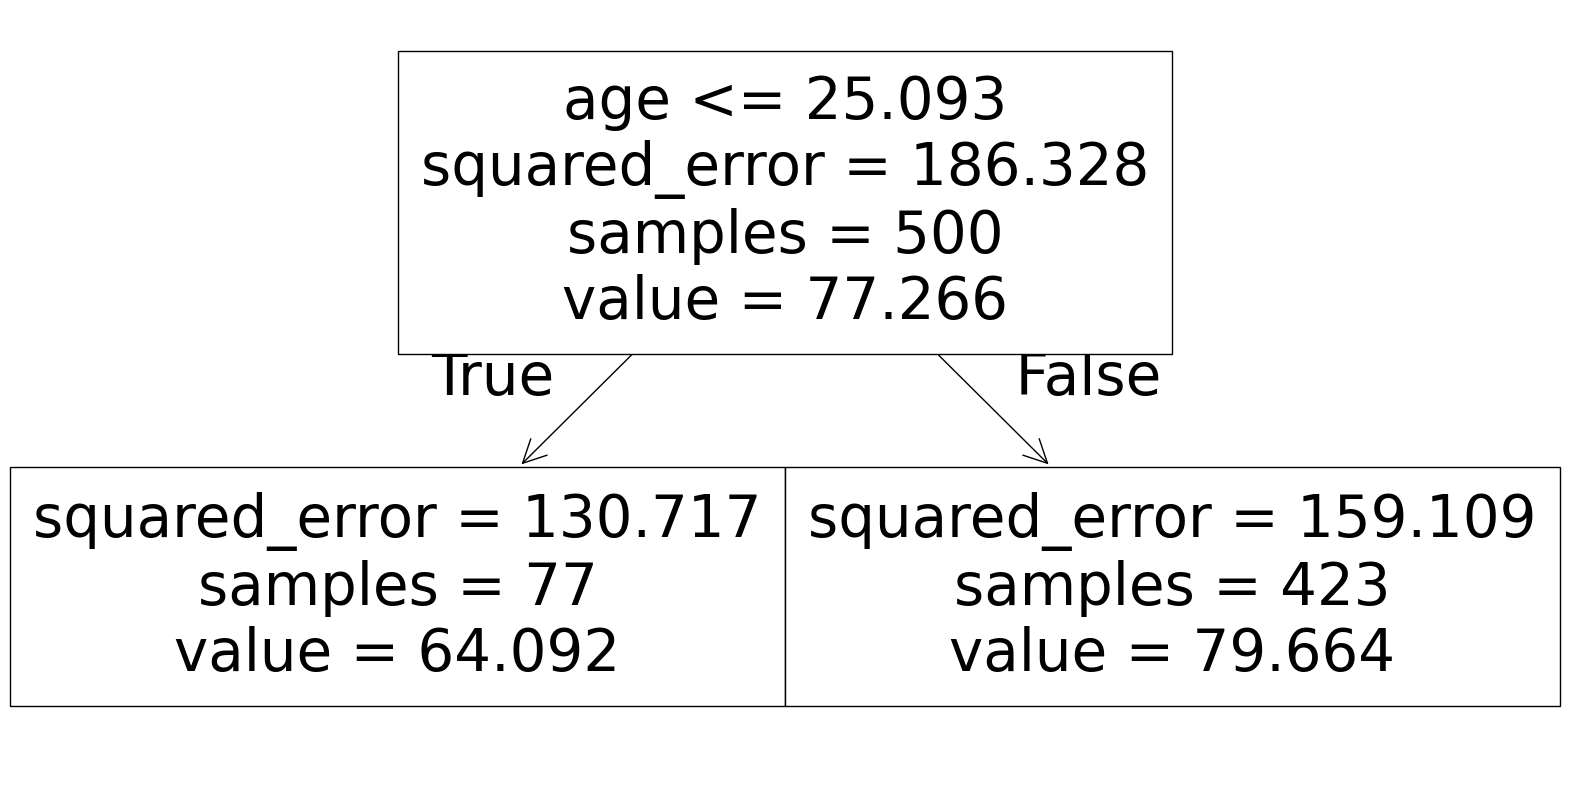

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns)
plt.show()

<Axes: xlabel='age', ylabel='income'>

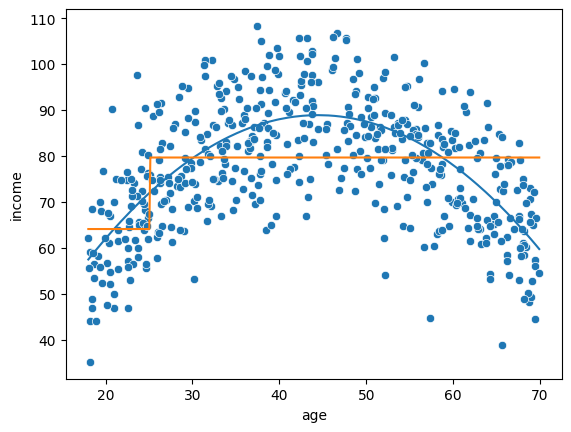

In [ ]:
## Show the data
sns.scatterplot(x='age', y='income', data=df)

## The lineplot shows the true CEF
sns.lineplot(x='age', y='CE', data=df)

## Plot the prediction
sns.lineplot(x=X.age, y=dtree.predict(X))

In [ ]:
dtree=DecisionTreeRegressor(max_depth=2).fit(X,y)
print("R²:", round(r2_score(y,dtree.predict(X)), 3))

R²: 0.371


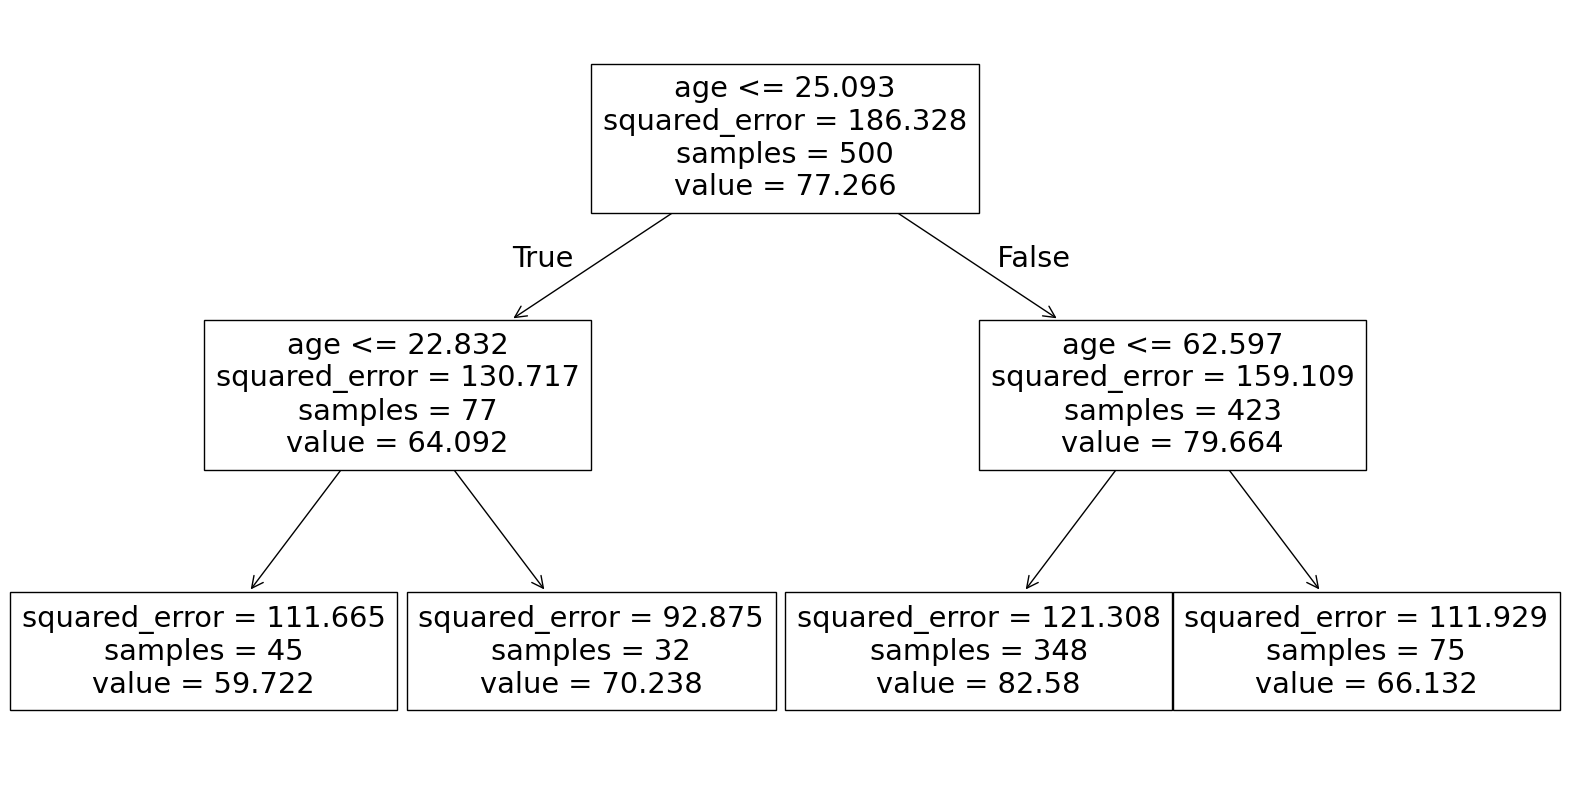

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns)
plt.show()

<Axes: xlabel='age', ylabel='income'>

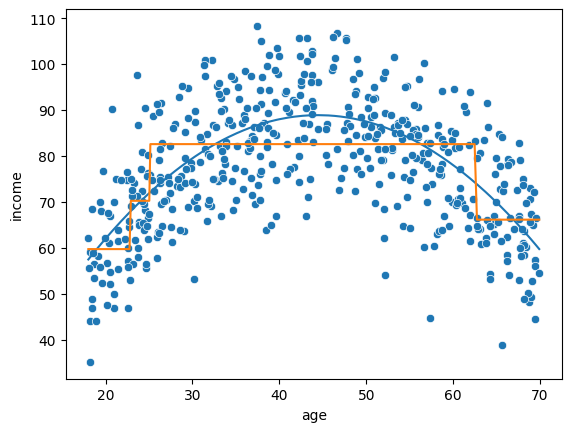

In [ ]:
## Show the data
sns.scatterplot(x='age', y='income', data=df)

## The lineplot shows the true CEF
sns.lineplot(x='age', y='CE', data=df)

## Plot the prediction
sns.lineplot(x=X.age, y=dtree.predict(X))

In [ ]:
dtree=DecisionTreeRegressor(max_depth=12).fit(X,y)
print("R²:", round(r2_score(y,dtree.predict(X)), 3))

R²: 0.849


<Axes: xlabel='age', ylabel='income'>

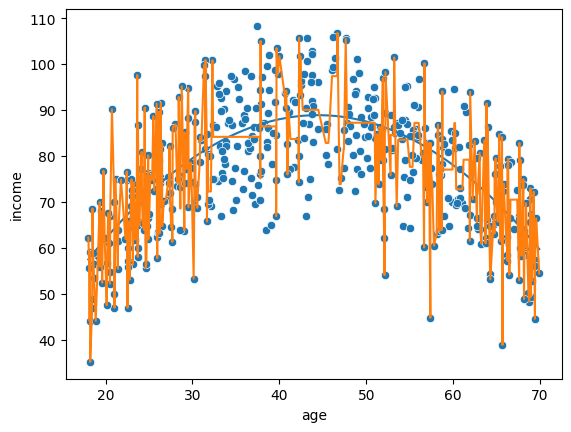

In [ ]:
## Show the data
sns.scatterplot(x='age', y='income', data=df)

## The lineplot shows the true CEF
sns.lineplot(x='age', y='CE', data=df)

## Plot the prediction
sns.lineplot(x=X.age, y=dtree.predict(X))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

In [ ]:
dtree=DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
print("Train R²:", round(r2_score(y_train,dtree.predict(X_train)), 3))
print("Test R²:", round(r2_score(y_test,dtree.predict(X_test)), 3))

Train R²: 0.437
Test R²: 0.355


In [ ]:
dtree=DecisionTreeRegressor(max_depth=12).fit(X_train,y_train)
print("Train R²:", round(r2_score(y_train,dtree.predict(X_train)), 3))
print("Test R²:", round(r2_score(y_test,dtree.predict(X_test)), 3))

Train R²: 0.893
Test R²: -0.043
